In [318]:
import pandas as pd

df=pd.read_excel("sample_dataset.xlsx")


print (df)

       ID  OverallQual  GrLivArea  YearBuilt  TotalBsmtSF  FullBath  HalfBath  \
0       1            5        629       2022          702         1         0   
1       2            2       2402       1972          251         1         1   
2       3            7       1547       1968         1224         3         0   
3       4            1        666       1937         2890         4         1   
4       5            9       2946       1985          768         2         1   
..    ...          ...        ...        ...          ...       ...       ...   
995   996            2        863       1947         1381         4         1   
996   997            8       1392       1963          203         2         0   
997   998            2        921       2005         1705         3         0   
998   999            8       3252       1930         3016         4         2   
999  1000            9       3336       1953         1961         2         0   

     GarageCars  GarageArea

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [290]:
df.describe()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,288.819436,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.000000,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,250.750000,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,500.500000,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,750.250000,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,1000.000000,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


In [291]:
df.dtypes

ID             int64
OverallQual    int64
GrLivArea      int64
YearBuilt      int64
TotalBsmtSF    int64
FullBath       int64
HalfBath       int64
GarageCars     int64
GarageArea     int64
SalePrice      int64
dtype: object

In [292]:
# There are 1000 rows and 10 columns
# There are columns with large number of null entries like PoolQC, MiscFeature
# The columns have Three types of datatypes: int64(35)

In [293]:
df['SalePrice'].describe()

count      1000.000000
mean     270963.885000
std      129264.336981
min       50363.000000
25%      157806.750000
50%      268642.500000
75%      385333.250000
max      499208.000000
Name: SalePrice, dtype: float64

In [294]:
# The average SalePrice of a house is 270963.885000
# The Maximum SalePrice of a house is  499208.000000 and Minimum 50363.000000 

Text(126.94000000000005, 0.5, 'Features')

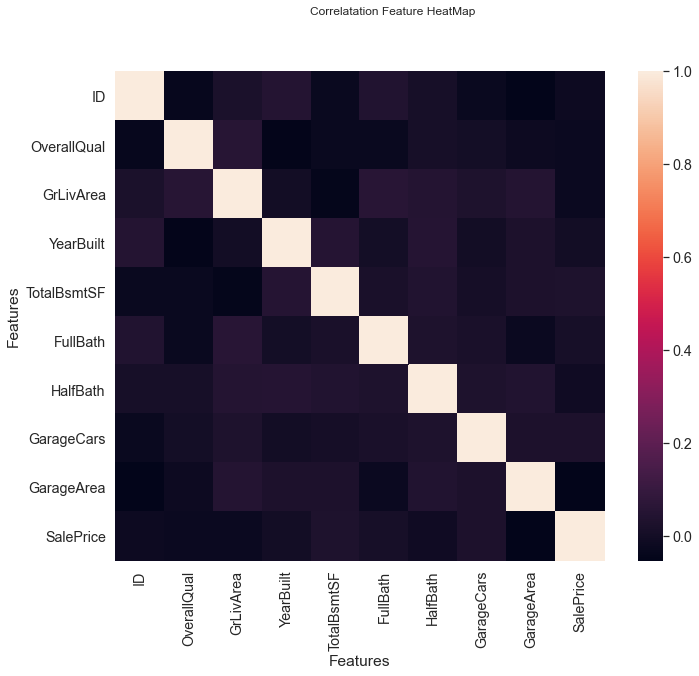

In [295]:
#correlation matrix
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

In [296]:
print("Correlation Values")

corr = df.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
TotalBsmtSF    0.031701
GarageCars     0.024781
FullBath       0.009416
YearBuilt     -0.004240
HalfBath      -0.009761
ID            -0.017432
GrLivArea     -0.022882
OverallQual   -0.023987
GarageArea    -0.051827
Name: SalePrice, dtype: float64


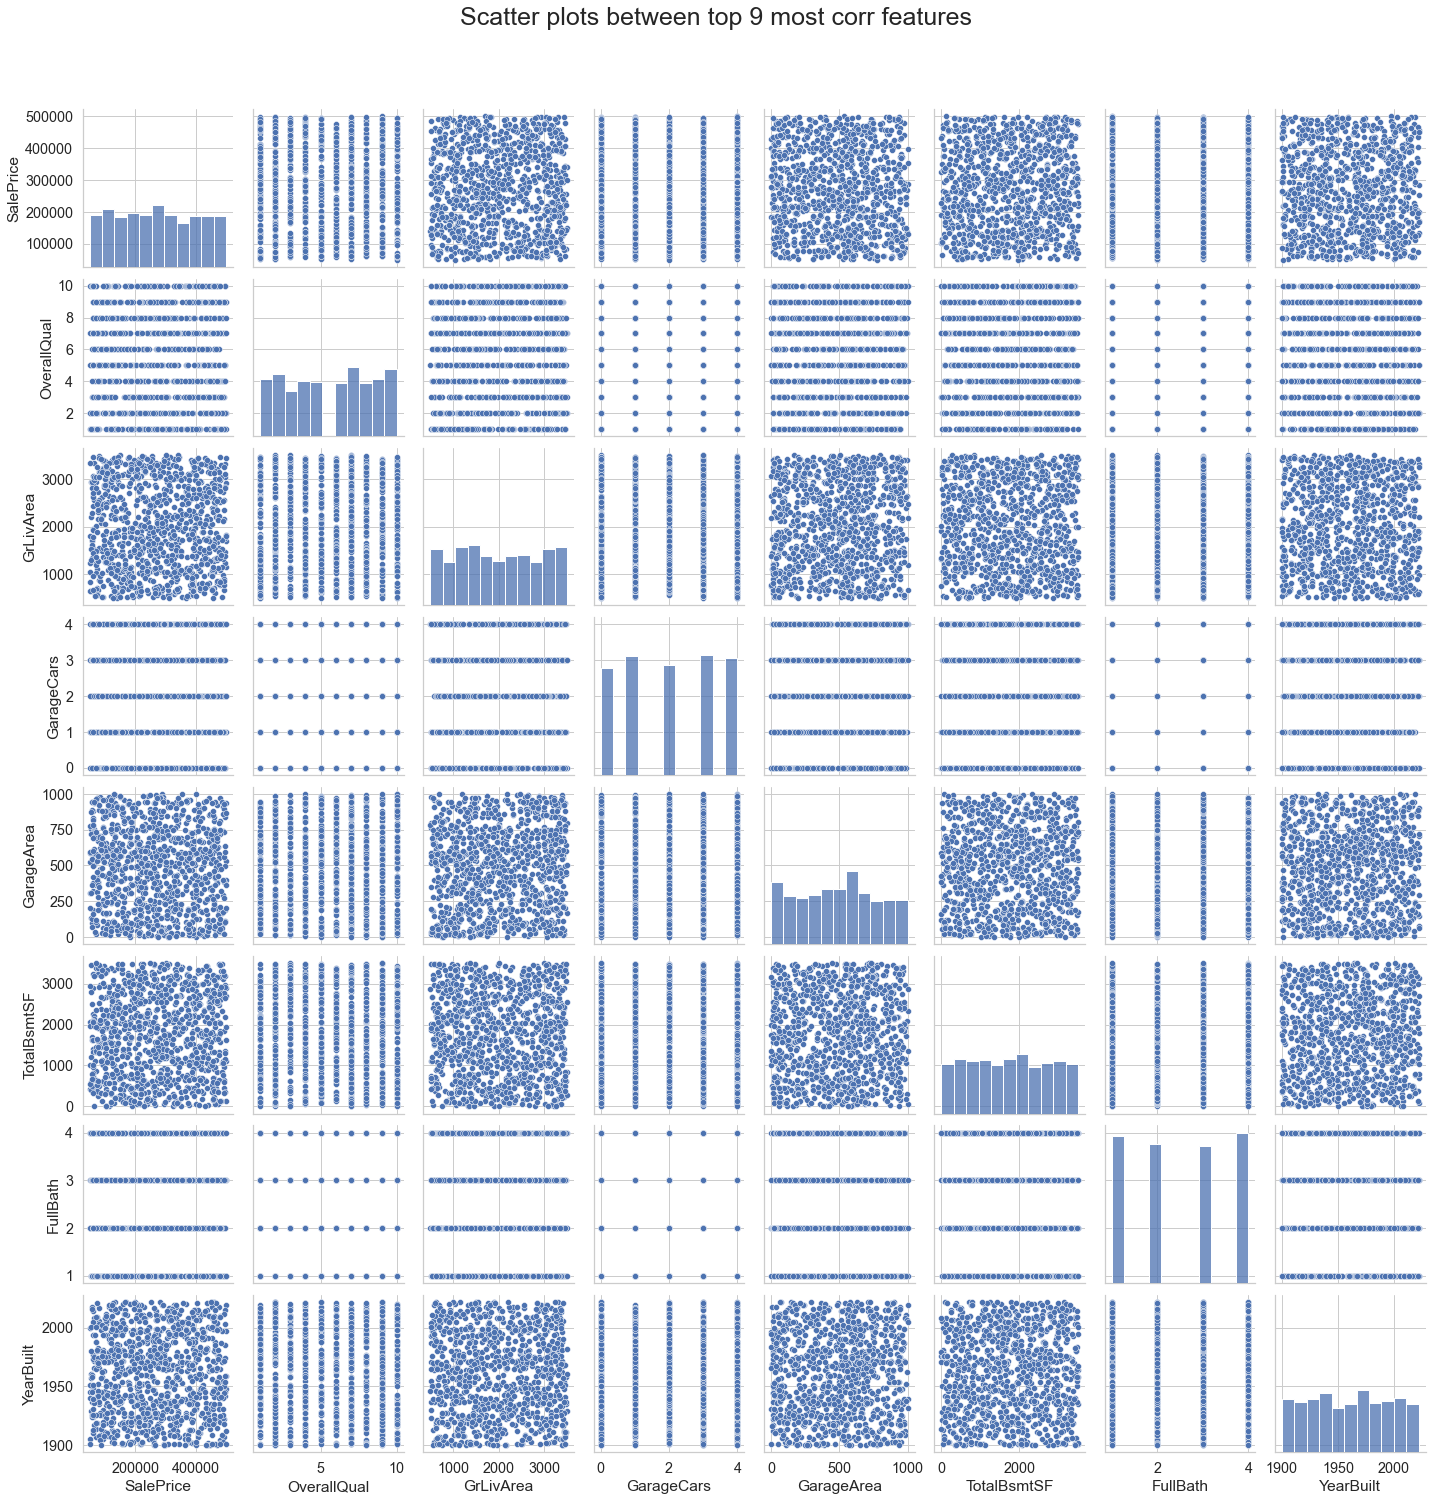

In [297]:
###pair plots
from pylab import rcParams
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

In [322]:
#drop id as it is not required for prediction
train_ID = df['ID']

df.drop(['ID'], axis=1, inplace=True)

df.shape, df.shape

((1000, 9), (1000, 9))

# check for the presence of categorical variables

In [323]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("Categorical variables found in the dataset.")
    print("Categorical columns:", categorical_columns)
else:
    print("No categorical variables found in the dataset.")

No categorical variables found in the dataset.


In [349]:
data.skew()

OverallQual   -0.058558
GrLivArea      0.038294
YearBuilt     -0.005849
TotalBsmtSF    0.008384
FullBath      -0.004579
HalfBath       0.010930
GarageCars    -0.028610
GarageArea    -0.003313
SalePrice     -0.159426
dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew of Rawdata: 0.053229
Kurt of Rawdata: -1.184671


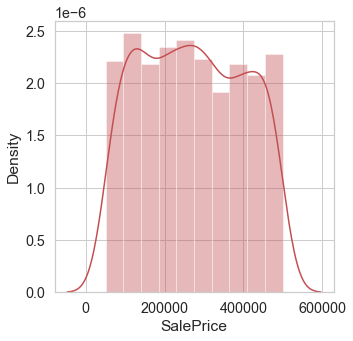

In [325]:
# Sales Price Visualisation
df['SalePrice'].describe()
sns.distplot(df['SalePrice'], color ="r")
print("Skew of Rawdata: %f" % df['SalePrice'].skew())
print("Kurt of Rawdata: %f" % df['SalePrice'].kurt())

In [326]:
df.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [329]:
data=df.copy()

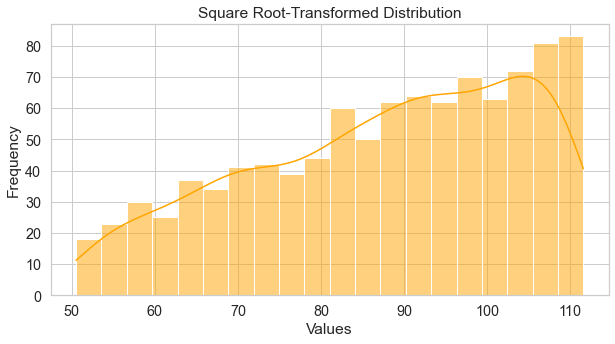

In [347]:
sqrt_transformed = np.sqrt(data["SalePrice"])

# Visualize the square root-transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(sqrt_transformed, kde=True, color='orange', bins=20)
plt.title('Square Root-Transformed Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [350]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df[a], y = df['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 864x864 with 0 Axes>

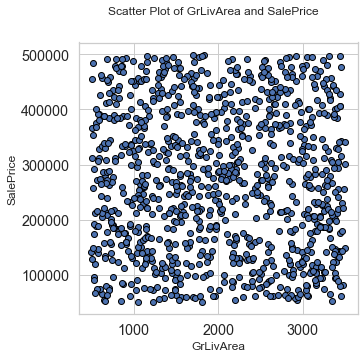

In [351]:
scatter_plot('GrLivArea')

In [352]:
####Missing values percentge

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

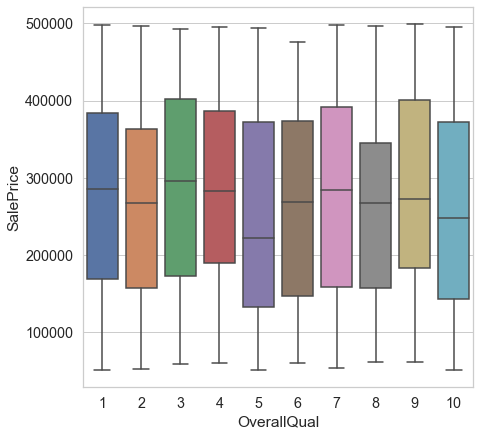

In [353]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
sns.boxplot(x = df['OverallQual'], y="SalePrice", data = data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1901'),
  Text(2, 0, '1902'),
  Text(3, 0, '1903'),
  Text(4, 0, '1904'),
  Text(5, 0, '1905'),
  Text(6, 0, '1906'),
  Text(7, 0, '1907'),
  Text(8, 0, '1908'),
  Text(9, 0, '1909'),
  Text(10, 0, '1910'),
  Text(11, 0, '1911'),
  Text(12, 0, '1912'),
  Text(13, 0, 

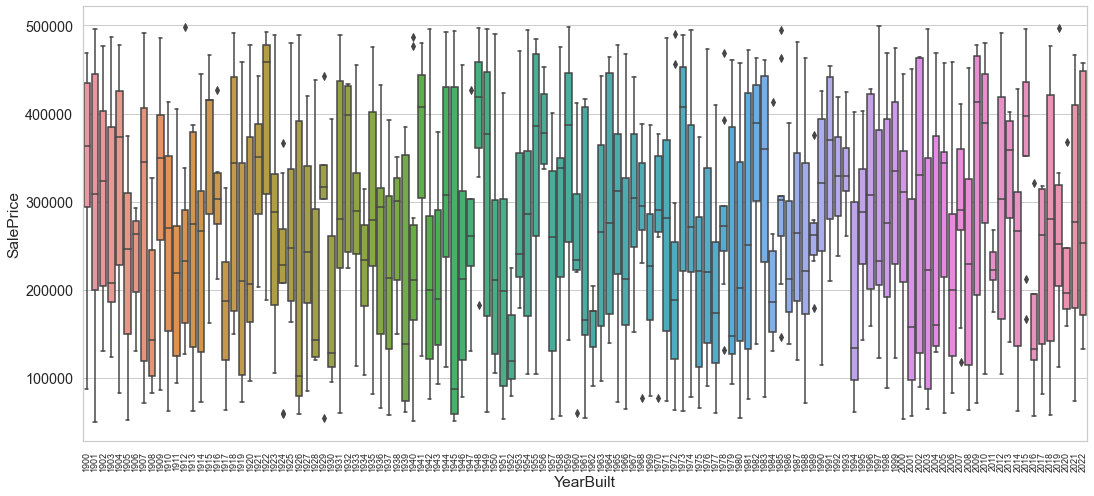

In [354]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
sns.boxplot(x= df['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.053229
Kurtosis: -1.184671


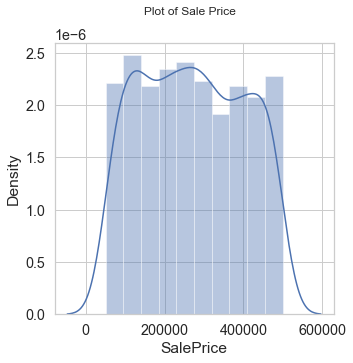

In [355]:
sns.distplot(df['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [455]:
# Feature engineering 

SyntaxError: invalid syntax (<ipython-input-455-41f5492ab6a2>, line 1)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


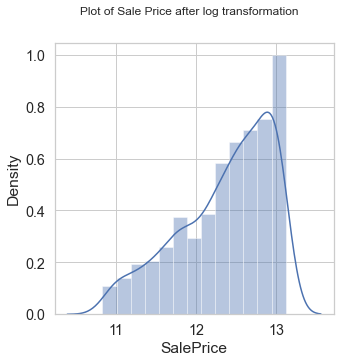

In [356]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally
data=df.copy()
data['SalePrice'] = np.log(data['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(data['SalePrice'])
plt.show()

In [357]:
# import numpy as np
# from scipy.stats import boxcox

# # Assuming 'data' is your dataset
# # You may need to ensure that your data is positive before applying Box-Cox transformation

# # Compute the Box-Cox transformation
# transformed_data, lambda_value = boxcox(data['SalePrice'])

In [358]:
data['SalePrice'].describe()

count    1000.000000
mean       12.363318
std         0.585570
min        10.827012
25%        11.969124
50%        12.501135
75%        12.861864
max        13.120778
Name: SalePrice, dtype: float64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.731167
Kurtosis: -0.404875


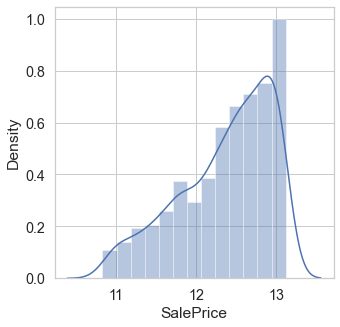

In [359]:
sns.distplot(data['SalePrice'])

print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

In [360]:
data.columns

Index(['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [361]:
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']))

In [362]:
df=data.drop(columns=['FullBath','HalfBath'])

In [363]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print (null_percentage)

OverallQual        0.0
GrLivArea          0.0
YearBuilt          0.0
TotalBsmtSF        0.0
GarageCars         0.0
GarageArea         0.0
SalePrice          0.0
Total_Bathrooms    0.0
dtype: float64


In [364]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

In [365]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [366]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageCars,GarageArea,SalePrice,Total_Bathrooms
0,5,629,2022,702,3,627,13.033593,1.0
1,2,2402,1972,251,3,705,11.273284,1.5
2,7,1547,1968,1224,1,282,12.663675,3.0
3,1,666,1937,2890,3,39,12.270385,4.5
4,9,2946,1985,768,4,848,12.627139,2.5


In [367]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt']

In [368]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2022 1972 1968 1937 1985 1996 1974 1988 1954 2015 1969 1919 1941 1912
 1914 1950 1931 2019 1924 1920 1901 2011 2017 1939 2007 1913 1964 1951
 2006 2009 2010 1922 1979 1900 2003 1959 1991 1934 2000 1911 1948 1923
 1925 1946 1963 1973 1966 1918 1906 2002 1978 1927 1938 1905 1942 1917
 2018 1935 1952 1975 1909 1983 1980 1957 2014 1990 1926 1977 1928 1998
 1965 1902 1944 1967 1953 2021 1903 1999 1943 1976 2001 1929 1955 1915
 1971 1916 1981 1910 2008 1984 1994 1970 2012 1947 2005 1956 1995 1936
 1986 1932 1949 1940 1904 1958 1962 2020 1907 1997 1961 1987 2013 1921
 1982 1930 1908 2016 1960 1993 1933 1989 1945 2004 1992]


Text(0.5, 1.0, 'House Price vs YearBuilt')

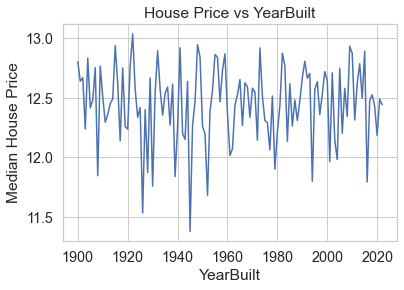

In [369]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is Built and the sales price

df.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('YearBuilt')
plt.ylabel('Median House Price')
plt.title("House Price vs YearBuilt")

In [370]:
import numpy as np
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


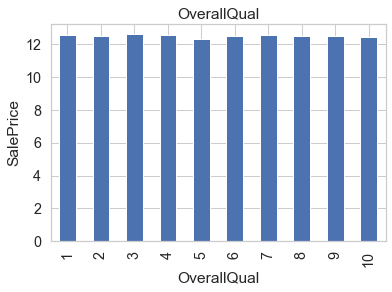

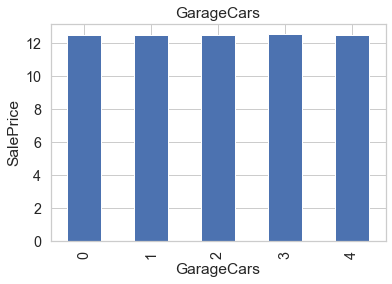

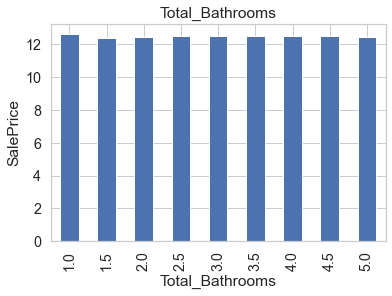

In [371]:

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [372]:
discrete_feature

['OverallQual', 'GarageCars', 'Total_Bathrooms']

In [373]:
###Continuous Variable

In [374]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


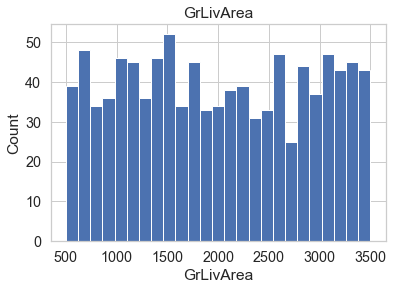

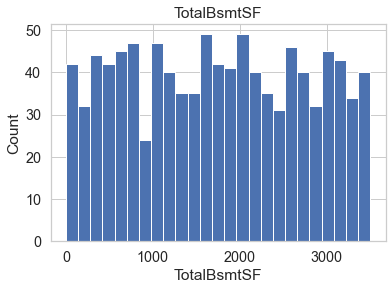

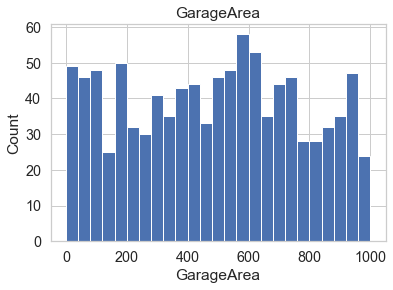

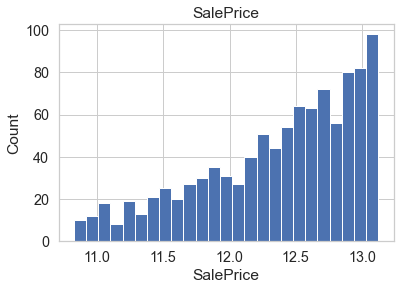

In [375]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [454]:
###logarithmic transformations because of skewness in dataset

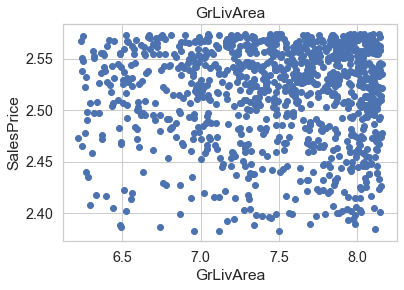

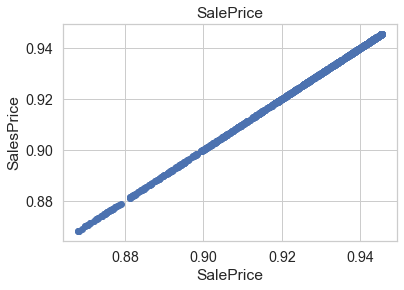

In [377]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

In [378]:
continuous_feature

['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']

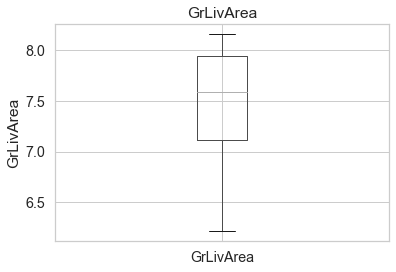

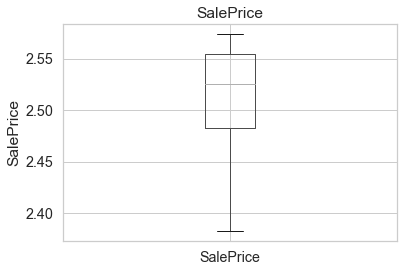

In [379]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    
        
    

In [380]:
import pandas as pd
data=df.copy()
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to remove outliers from
column_data = data['SalePrice']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

# Remove outliers
data_cleaned = data[~data['SalePrice'].isin(outliers)]

# Optional: Print information about removed outliers
print("Number of outliers removed:", len(outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Number of outliers removed: 0
Lower bound: 10.630013885851055
Upper bound: 14.200973777741352


In [381]:

data=df.copy()
# Assuming 'data' is your DataFrame and 'column_name' is the column you want to remove outliers from
column_data = data['GrLivArea']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

# Remove outliers
data_cleaned = data[~data['GrLivArea'].isin(outliers)]

# Optional: Print information about removed outliers
print("Number of outliers removed:", len(outliers))
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Number of outliers removed: 0
Lower bound: -1140.625
Upper bound: 5164.375


In [382]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

In [383]:
###Remove Skewness

In [384]:
numerical_features
for feature in numerical_features:
    df[feature]=np.log(df[feature])

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [385]:
scaling_feature=[feature for feature in df.columns if feature not in ['SalePrice'] ]
len(scaling_feature)

7

In [386]:
is_inf = np.isinf(df)
print(is_inf)

     OverallQual  GrLivArea  YearBuilt  TotalBsmtSF  GarageCars  GarageArea  \
0          False      False      False        False       False       False   
1          False      False      False        False       False       False   
2          False      False      False        False       False       False   
3          False      False      False        False       False       False   
4          False      False      False        False       False       False   
..           ...        ...        ...          ...         ...         ...   
995        False      False      False        False       False       False   
996        False      False      False        False       False       False   
997        False      False      False        False        True       False   
998        False      False      False        False       False       False   
999        False      False      False        False       False       False   

     SalePrice  Total_Bathrooms  
0        False   

In [387]:
inf_rows = is_inf.any(axis=1)  # Check for rows containing infinite values
inf_cols = is_inf.any(axis=0)  # Check for columns containing infinite values
print(inf_rows)
print(inf_cols)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999    False
Length: 1000, dtype: bool
OverallQual        False
GrLivArea          False
YearBuilt          False
TotalBsmtSF         True
GarageCars          True
GarageArea          True
SalePrice          False
Total_Bathrooms    False
dtype: bool


In [388]:
print("Rows containing infinite values:")
print(df[inf_rows])

print("\nColumns containing infinite values:")
print(df.loc[:, inf_cols])


Rows containing infinite values:
     OverallQual  GrLivArea  YearBuilt  TotalBsmtSF  GarageCars  GarageArea  \
5       1.609438   7.882315   7.598900     7.104965        -inf    1.386294   
6       1.945910   7.106606   7.587817     6.569481        -inf    6.670766   
13      2.197225   7.299797   7.570959     7.467942        -inf    6.373320   
15      1.609438   7.607878   7.556951     7.884200        -inf    6.313548   
23      2.302585   6.526495   7.606387     6.165418        -inf    3.761200   
..           ...        ...        ...          ...         ...         ...   
975     1.791759   8.090402   7.605890     7.257708        -inf    5.720312   
976     1.609438   7.716906   7.589842     7.770223        -inf    6.616065   
978     2.197225   7.219642   7.601402     8.160232        -inf    6.598509   
984     2.197225   7.599902   7.584265     8.158802        -inf    6.095825   
997     0.693147   6.825460   7.603399     7.441320        -inf    6.396930   

     SalePrice  To

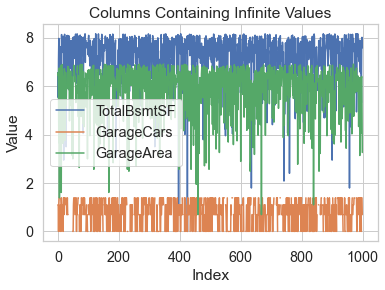

In [389]:
# Filter columns containing infinite values
inf_cols = df.columns[df.isin([np.inf, -np.inf]).any()]

# Plot columns containing infinite values
for col in inf_cols:
    plt.plot(df.index, df[col], label=col)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Columns Containing Infinite Values')
plt.legend()
plt.grid(True)
plt.show()


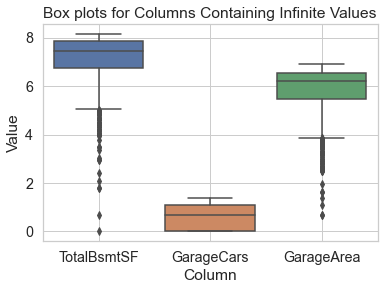

In [390]:
inf_cols = df.columns[df.isin([np.inf, -np.inf]).any()]

# Plot box plots for columns containing infinite values using Seaborn
sns.boxplot(data=df[inf_cols])
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box plots for Columns Containing Infinite Values')
plt.grid(True)
plt.show()

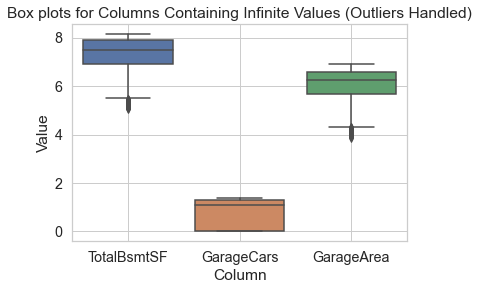

In [391]:
for col in inf_cols:
    # Compute the 25th and 75th percentiles
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Compute the interquartile range (IQR)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with NaNs
# Replace outliers with NaNs
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Plot box plots for columns after handling outliers
sns.boxplot(data=df[inf_cols])
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box plots for Columns Containing Infinite Values (Outliers Handled)')
plt.grid(True)
plt.show()

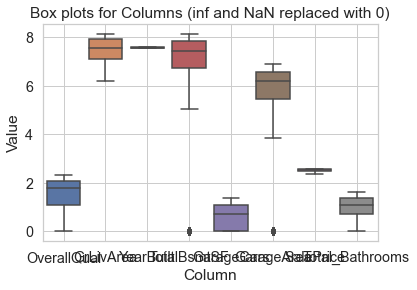

In [392]:
# Replace infinite values with zero
df.replace([np.inf, -np.inf], 0, inplace=True)

# Replace NaN values with zero
df.fillna(0, inplace=True)

# Plot box plots for columns after replacing inf and NaN values with zero
sns.boxplot(data=df)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box plots for Columns (inf and NaN replaced with 0)')
plt.grid(True)
plt.show()

In [393]:
inf_cols = df.columns[df.isin([np.inf, -np.inf]).any()].tolist()

In [404]:
df.dtypes

OverallQual        int32
GrLivArea          int32
YearBuilt          int32
TotalBsmtSF        int32
GarageCars         int32
GarageArea         int32
SalePrice          int32
Total_Bathrooms    int32
dtype: object

In [405]:
for i in df.columns:
    df[i] = df[i].round().astype(int)

In [406]:
# feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']]

# # from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# # scaler.fit(df[feature_scale])
# # scaler = StandardScaler()
# scaler.fit(df[feature_scale])
# # X_train_scaled = scaler.fit_transform(df_x_drop[feature_scale])
# # X_test_scaled = scaler.transform(X_test)
# print (feature_scale)

In [407]:
scaler.transform(df[feature_scale])

array([[1.        , 0.        , 0.        , ..., 1.        , 0.85714286,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 0.5       , 0.        , ..., 0.        , 0.85714286,
        0.5       ],
       ...,
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.85714286,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.71428571,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.5       ]])

In [408]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [409]:
data.head()

,SalePrice,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageCars,GarageArea,Total_Bathrooms
0,3,1.0,0.0,0.0,0.875,1.0,0.857143,0.0
1,2,0.5,1.0,0.0,0.750,1.0,1.000000,0.0
2,3,1.0,0.5,0.0,0.875,0.0,0.857143,0.5
3,3,0.0,0.5,0.0,1.000,1.0,0.000000,1.0
4,3,1.0,1.0,0.0,0.875,1.0,1.000000,0.5


In [410]:
## drop dependent feature from dataset
X_train=data.drop(['SalePrice'],axis=1)
## Capture the dependent feature
y_train=data[['SalePrice']]

In [411]:
# from sklearn.linear_model import Lasso,Ridge
# from sklearn.feature_selection import SelectFromModel

# feature_sel_model = SelectFromModel(Ridge(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
# feature_sel_model.fit(X_train, y_train)

In [402]:
# feature_sel_model.get_support()

In [412]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(
#     np.sum(sel_.estimator_.coef_ == 0)))

total features: 7
selected features: 7


In [413]:
# X_train=X_train[selected_feat]

In [190]:
# X_train=X_train[['OverallQual', 'YearBuilt', 'GarageCars', 'GarageArea']]

In [414]:
# correlation_matrix = data.corr()

# # Identify features with low and high correlation with the target variable
# target_correlation_threshold = 0.01  # Example threshold for target correlation
# low_correlation_features = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) < target_correlation_threshold].index.tolist()
# high_correlation_features = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) >= target_correlation_threshold].index.tolist()

# # Identify features with high correlation with each other
# feature_correlation_threshold = 0.99  # Example threshold for feature correlation
# high_correlation_pairs = []
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i + 1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) >= feature_correlation_threshold:
#             high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# # Select relevant features
# selected_features = [col for col in data.columns if col not in low_correlation_features and col not in high_correlation_pairs]

# print("Selected features:", selected_features)

In [415]:
# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [417]:
# Now you have X_train_scaled_df, X_test_scaled_df, y_train, y_test ready for further analysis or modeling

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate the Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train_1, y_train_1)

# Predict house prices on the test data
y_pred = rf_regressor.predict(X_test_1)


# Predict probabilities for the test set
# probs = rf_regressor.predict_proba(X_test_1)[:, 1]
# Evaluate the model's performance
mse = mean_squared_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# fpr, tpr, thresholds = roc_curve(y_test_1, probs)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.2772254851584415
Mean Absolute Error (MAE): 0.44727570731965677


In [453]:
###K nearest neighbours

In [419]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train_1,y_train_1)

#predict value of sale price on the training set
y_pred = neigh.predict(X_test_1)

#caculate root mean square error
mse = mean_squared_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.27519999999999994
Mean Absolute Error (MAE): 0.46399999999999997


In [420]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 7,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train_1,y_train_1)

#predict value of sale price on the training set
y_pred = neigh.predict(X_test_1)

#caculate root mean square error
mse = mean_squared_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.25367346938775515
Mean Absolute Error (MAE): 0.45000000000000007


In [452]:
# Mix of Models for predictions
# Randomfores,Decision trees,Xgboost

In [421]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
#     "Logistic Regression": LogisticRegression(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "XGBoost Regression": XGBRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_1, y_train_1)
    y_pred = model.predict(X_test_1)
    mse = mean_squared_error(y_test_1, y_pred)
    mae = mean_absolute_error(y_test_1, y_pred)
   
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    print("--------------------------")



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Random Forest Regression
Mean Squared Error (MSE): 0.2772254851584415
Mean Absolute Error (MAE): 0.44727570731965677
--------------------------
Model: Decision Tree Regression
Mean Squared Error (MSE): 0.32809958074198
Mean Absolute Error (MAE): 0.44365821240163344
--------------------------
Model: XGBoost Regression
Mean Squared Error (MSE): 0.30931216726429683
Mean Absolute Error (MAE): 0.46997580766677854
--------------------------


In [422]:

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [424]:
svr_basic = SVR(C = 10, gamma = 0.001)
# grid search to find best value of C, gamma and epsilon and default kernel 'rbf'
param_grid  = {'C': [5,7,10,15,20,30],'gamma': [0.001, 0.0001, 0.0011, 0.00011], 'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008, 0.009] }

# set cross validation to 5
clf = GridSearchCV(svr_basic, param_grid, cv = 10, n_jobs = -2)
clf.fit(X_train_1,y_train_1)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=SVR(C=10, gamma=0.001), n_jobs=-2,
             param_grid={'C': [5, 7, 10, 15, 20, 30],
                         'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008,
                                     0.009],
                         'gamma': [0.001, 0.0001, 0.0011, 0.00011]})

In [425]:
clf.best_params_

{'C': 20, 'epsilon': 0.1, 'gamma': 0.001}

In [427]:
svr = make_pipeline(MinMaxScaler(), SVR(C= 5, epsilon= 0.1, gamma=0.0011, kernel = "sigmoid"))

In [432]:
#fit
model_svr = svr.fit(X_train_1, y_train_1)

#predict value of sale price on the training set
y_pred = svr.predict(X_test_1)

#caculate root mean square error
mse = mean_squared_error(y_test_1, y_pred)
mae = mean_absolute_error(y_test_1, y_pred)

print(f"Model: {model_svr}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")



Model: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=5, gamma=0.0011, kernel='sigmoid'))])
Mean Squared Error (MSE): 0.24197994548117127
Mean Absolute Error (MAE): 0.33200770719754774


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [456]:
###Gradient boosting

In [434]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42) 

In [435]:
#fit
model_gbr1 = gbr1.fit(X_train_1, y_train_1)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_test_1)


#caculate root mean square error
mse = mean_squared_error(y_test_1, y_g1_pred)
mae = mean_absolute_error(y_test_1, y_g1_pred)

print(f"Model: {model_gbr1}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=7,
                          min_samples_leaf=7, n_estimators=200,
                          random_state=42)
Mean Squared Error (MSE): 0.2608976641679839
Mean Absolute Error (MAE): 0.43816490068733527


###Stacked prediction

In [441]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [("Support Vector Regressor",svr),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [443]:
stacked = StackingRegressor(estimators = estimators, final_estimator = svr, cv=5)

In [451]:
model_stack = stacked.fit(X_train_1, y_train_1)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_test_1)

#caculate root mean square error
mse = mean_squared_error(y_test_1, y9_pred)
mae = mean_absolute_error(y_test_1, y9_pred)
print(f"Model: {model_gbr1}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=7,
                          min_samples_leaf=7, n_estimators=200,
                          random_state=42)
Mean Squared Error (MSE): 0.24200777945841367
Mean Absolute Error (MAE): 0.3320665817488602


In [446]:
###Observations

In [449]:
# SVM and Stacked predictions provide better mse and mae